# Python-MLearning: Digits Recognition using Gradient Boosting Machine (GBM), PCA Reduced Dimension, and Sklearn Library

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I GENERALITIES

This paper deals with an application of the Gradient Boosting Machine (GBM) algorithm to the MNIST database, in order to obtain a model that allows to recognize handwritten digits and classify them in an appropriate way.

The model obtained consider the PCA components of the database (154) that explain 95% of the total variation of the data.

RandomizedSearchCV search is used to access suitable hyperparameters within a proposed range.

The MNIST database is available at http://yann.lecun.com/exdb/mnist/. The present project initially considers a complete version of MINIST called "mnist_My.csv" which includes the 70 thousand original images. This is achieved by joining the training (60,000 images) and testing (10,000) files that are usually delivered separately.

RandomizedSearchCV takes a non-depressible time to access the results. For this reason, I consider only a small sample to perform the search (the same <u>train</u> dataset instead the <u>full</u> dataset), and then I project the results to the remaining base. Of course, all this is done with the ultimate goal of reducing processing times, nothing more.

Finally, a way to explore the MNIST database can be found [here](http://www.arqmain.net/Researches/Researchs/Digit_Recognition/Exploratory_DAnalysis/Exploratory_DAnalysis_MNIST_RProject.html).

# II IMPORT REQUIRED PACKAGES

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as pl
%matplotlib inline
from datetime import datetime
# machine learning
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve 
from sklearn.decomposition import PCA

#3.2.4.3.5. sklearn.ensemble.GradientBoostingClassifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

# III LOADING DATA

In [2]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\BoostingAlgorithms\\Gradient Boosting (GBM)\\GBM2'

In [3]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Links to GBM2 GITHUBE and Nbviewer.txt',
 'Nueva carpeta',
 'PYTHON-MLearning_GBM2_PCA_Final.ipynb',
 'To print Features Importance.txt']

In [4]:
# read csv (comma separated value) into data
data=pd.read_csv('..\..\..\RandomForest\RandomForest2\mnist_My.csv')
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [5]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

# IV MODELING

## Train and Validation Datasets

In [6]:
#Divide data_pca and Y_data into train and test data
X_train, X_test, y_train_pca,  y_test_pca = train_test_split(X_data, y_data, test_size=0.98, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train_pca.shape, y_test_pca.shape

((1400, 784), (68600, 784), (1400,), (68600,))

In [7]:
y_data = data['label'].values
X_data = data.drop('label', axis=1).values                   
data.shape, y_data.shape, X_data.shape

((70000, 785), (70000,), (70000, 784))

## Reduce dimension using PCA

### Reduce dimension general analysis

In [9]:
#Reduce dimension into 95% information
pca = PCA(0.95)
X_data_pca = pca.fit_transform(X_data)
X_data_pca.shape

(70000, 154)

Text(0,0.5,'cumulative explained variance')

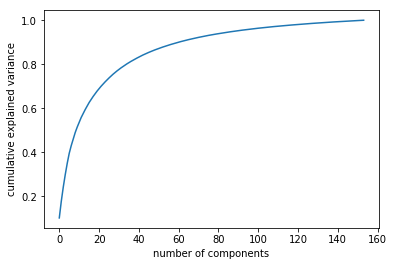

In [10]:
#plot to visualize % of total variance accumulated by the components
pca = PCA().fit(X_data_pca)
pl.plot(np.cumsum(pca.explained_variance_ratio_))
pl.xlabel('number of components')
pl.ylabel('cumulative explained variance')

Text(0.5,1,'Projection on the Two First Principal Components ')

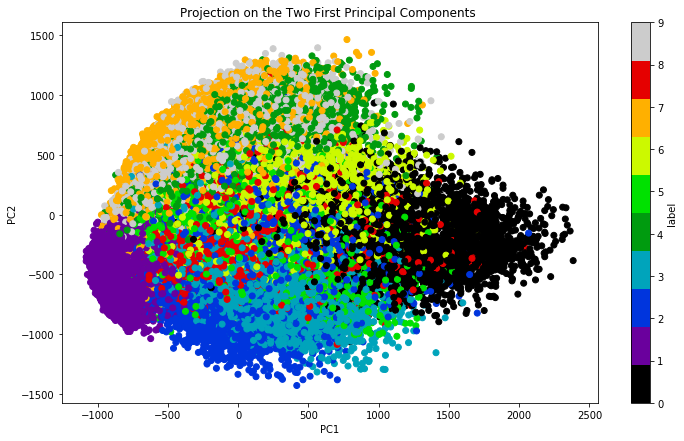

In [11]:
#plot of two first components
pl.subplots(nrows=1, ncols=1, figsize=(12,7))
pl.scatter(X_data_pca[:,0], X_data_pca[:,1], c=y_data, cmap=pl.get_cmap('nipy_spectral', 10))
pl.colorbar(label='label')
pl.xlabel('PC1')
pl.ylabel('PC2')
pl.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

## Build Model

### What values for the model's hyperparameters would be selected?

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_grid = {'n_estimators' : [50,100,150,200], 
    'learning_rate' : [.1,.2,.3],
    'subsample':[0.6,0.75,0.85,0.9],
    'max_depth' : [3,5,7] 
}

# Instantiate a Decision Tree classifier: tree
gbm = GradientBoostingClassifier(random_state=7) 

# Instantiate the RandomizedSearchCV object: rf_cv
kfold = StratifiedKFold(n_splits=3, random_state=0)
gbm_cv = RandomizedSearchCV(estimator=gbm,  param_distributions=param_grid, n_jobs=-1, verbose=2, cv= kfold)

# Fit it to the data
gbm_cv.fit(X_train_pca, y_train_pca)
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 12.2min finished


In [28]:
# Print the tuned parameters and score
print("Tuned LR Parameters: {}".format(gbm_cv.best_params_))
print("Best score is {}".format(gbm_cv.best_score_))

Tuned LR Parameters: {'subsample': 0.6, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.1}
Best score is 0.7978571428571428


## Using the best parameters to Fit, Evaluate, and Make predictions

## Fitting the Model

In [8]:
# train your model using X_train, y_train and the best known parameters
gbmpca = GradientBoostingClassifier(subsample = 0.6, n_estimators = 150, max_depth = 5, learning_rate = 0.1, random_state=7)
gbmpca.fit(X_train_pca, y_train_pca)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=7, subsample=0.6, verbose=0,
              warm_start=False)

### Evaluating the Model

#### <font color=orange><i>Getting Accuracy and Confusion Matrix</i></font>

In [9]:
# Evaluating LR model
print('With KNN train datasets () accuracy is: ',round(gbmpca.score(X_train_pca,y_train_pca),4)) # accuracy 

With KNN train datasets () accuracy is:  1.0


In [10]:
predictions = gbmpca.predict(X_test_pca)
print('Accuracy based on X_test_pca, y_test_pca: ',accuracy_score(y_test_pca, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test_pca, predictions))
print('With KNN train datasets () accuracy is: ',round(gbmpca.score(X_train_pca,y_train_pca),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test_pca, predictions))

Accuracy based on X_test_pca, y_test_pca:  0.8325510204081633

Confusion Matrix:
  [[6007    1   48   53   36  349  106   41   91   33]
 [   0 7420   54   35    2   98   24    6   69   11]
 [ 132   69 5146  251  153  294  142  152  406  105]
 [  40   81  160 5583   16  546   87   77  321   87]
 [  12   72   58   36 5554   70  161   38  180  507]
 [  71  102  220  501  139 4638  145   12  216  143]
 [  54  107  214   74   42  262 5821   37   99   28]
 [  54  119   86   41  188   53    6 6320   49  231]
 [  45  127  243  384   51  374   27   69 5237  132]
 [  62   65   43  126  425  131   31  393  156 5387]]
With KNN train datasets () accuracy is:  1.0
             precision    recall  f1-score   support

          0       0.93      0.89      0.91      6765
          1       0.91      0.96      0.93      7719
          2       0.82      0.75      0.78      6850
          3       0.79      0.80      0.79      6998
          4       0.84      0.83      0.84      6688
          5       0.68

In [23]:
#pl.subplots(nrows=1, ncols=1, figsize=(20,10))
#predictors=list(X_train_pca)
#feat_imp = pd.Series(gbmpca.feature_importances_, predictors).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Importance of Features')
#pl.ylabel('Feature Importance Score')

Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on GBM testing datasets (X_test_pca, y_test_pca), looks like we misclassified 11487 digit's images, leaving us with a 90.43% accuracy rate  (with 83% precision and 83% recall). Meantime, With KNN train datasets (X_train_pca,y_train_pca) accuracy is 100%

#### <font color=orange><i>Examining the Model's Mistakes</i></font>

Let us determine the examples in the validation set where the model predictions were wrong. These correspond to the elements of <font color=red>y_test</font> that are not equal to the same entry in <font color=red>predictions</font>. The numpy where function returns a list of indices that satisfy a condition, so the indices corresponding to the errors are:

In [37]:
error_idx = np.where(y_test_pca != predictions)[0]
error_idx
#pd.Series(error_idx.tolist())

array([    8,    21,    22, ..., 68597, 68598, 68599], dtype=int64)

In [38]:
len(error_idx)

11487

We'll choose 20 indices at random from our error_idx array and plot the image, together with the prediction and the correct label:

In [39]:
rand_idx = np.random.choice(error_idx, size=20, replace=False)
rand_idx

array([ 3387,  4152, 56980, 67300,  7554, 18757, 36165, 56255, 22256,
       45016,  3750, 43280,  6445, 52573, 28804, 36871,  8627, 59089,
       49666, 23290], dtype=int64)

The PCA procedure of Sklearn allows us to move from a compressed representation (in our case 154 components) to an approximation of the original high-dimensional data (784 variables). This is really cool, isn’t it? o, now we use this option to generate the desired visualization.

In [40]:
Xtest784back = pca.inverse_transform(X_test_pca)

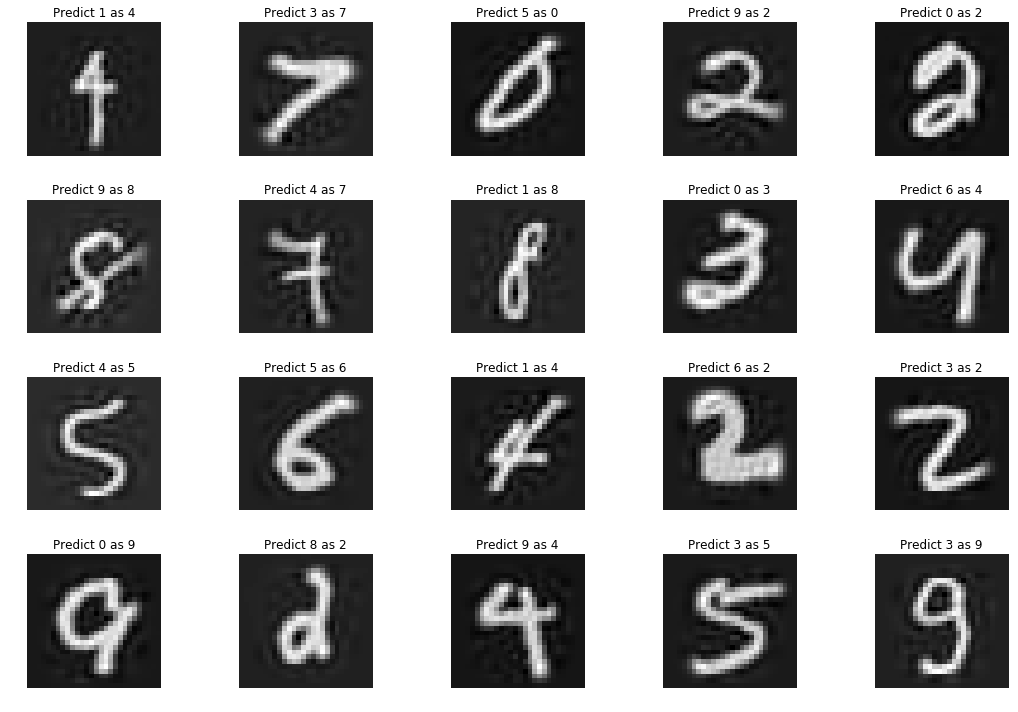

In [41]:
fig, axs = pl.subplots(nrows=4, ncols=5, figsize=(15,10))

i = 0
for ax in axs.reshape(-1):
    ax.set_title("Predict %d as %d" % (predictions[rand_idx[i]],y_test_pca[rand_idx[i]]))
    ax.imshow(Xtest784back[rand_idx[i]].reshape(28,28), cmap=pl.cm.gray, origin='upper', interpolation='nearest')
    ax.axis('off')
    i += 1
pl.tight_layout()    
pl.show()

In the exploratory stage of these data () it is concluded that we should expect that the model does not present an extremely high accuracy because the digits have different strokes and, in some cases, turn out to be very strange.
  
From the previous visualization, we can see that the errors of classification of the images are based on that, in general, we can find some cases in which the writing is deficient or the digit has a strange orientation.

This situation, which usually is not a real problem for a human being, constitutes a base of error not easy to overcome by a computational algorithm.

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [42]:
predictions = cross_val_predict(gbmpca, X_train_pca, y_train_pca, cv=3)
print('Prediction: {}', predictions)

Prediction: {} [5 1 8 ... 7 3 3]


#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset.  In our case, the new dataset is the X_test one.

In [ ]:
# train your model using all data.
startTime = datetime.now()
gbmpca.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

In [ ]:
predictions = gbmpca.predict(X_test_pca)
print('Prediction: {}', predictions)

<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; July 25, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>